In [ ]:
!pip install numpy matplotlib

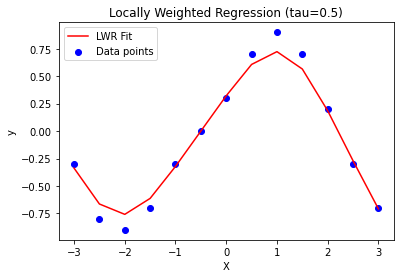

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def gaussian_kernel(x, xi, tau):
    return np.exp(-np.sum((x - xi) ** 2) / (2 * tau ** 2))

def locally_weighted_regression(X, y, query_point, tau):
    m, n = X.shape
    W = np.zeros((m, m))
    
    for i in range(m):
        W[i, i] = gaussian_kernel(query_point, X[i], tau)
    
    X_bias = np.hstack((np.ones((m, 1)), X))
    query_point_bias = np.hstack(([1], query_point))
    
    XTWX = X_bias.T @ W @ X_bias
    if np.linalg.det(XTWX) == 0.0:
        theta = np.linalg.pinv(XTWX) @ X_bias.T @ W @ y
    else:
        theta = np.linalg.inv(XTWX) @ X_bias.T @ W @ y
    
    y_pred = query_point_bias @ theta
    return y_pred

# Load dummy dataset from CSV
data = pd.read_csv('dummy_data.csv')
X = data[['X']].values  # Must be 2D array
y = data['y'].values

# Sort for plotting
sorted_idx = np.argsort(X.ravel())
X_sorted = X[sorted_idx]
y_sorted = y[sorted_idx]

# Predict y values for all X using LWR
tau = 0.5  # bandwidth parameter, change to see effect
y_pred = np.array([locally_weighted_regression(X, y, x_i, tau) for x_i in X])

# Plot original data and LWR fit
plt.scatter(X, y, label="Data points", color='blue')
plt.plot(X_sorted, y_pred[sorted_idx], label="LWR Fit", color='red')
plt.xlabel('X')
plt.ylabel('y')
plt.title(f'Locally Weighted Regression (tau={tau})')
plt.legend()
plt.show()